# Generate Datasets

The purpose of this notebook is to use the raw data to create two datasets that will contain all the data<br/>
needed for the remainder of the project:<br/><br/>
1) admission_diagnosis_table: This dataset contains the most important patient demographic and diagnosis data<br/>
for all admissions. This dataset will be used to create the test groups: patients who were diagnosed with Acute<br/>
Kidney Failure and patients who were not, ensuring that the two groups are fairly matched on other patient<br/>
characteristics, such as age & gender.<br/>
2) first_reading: This dataset contains the first readings for 39 chart and lab items for each admission. This<br/>
is the data on which the Machine Learning models will be built to predict whether patients had Acute Kidney<br/>
Failure.<br/><br/>
Once these datasets are created they will be saved on AWS S3, and the raw data will not be needed again.

In [1]:
import os
import sys
import pandas as pd

In [2]:
# Set up paths & import src functions
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_folder = os.path.join(project_root, 'src')
sys.path.insert(0, src_folder)
from generate_datasets import *
from stats_and_visualisations import *
from s3_storage import *
from utilities import *

## admission_diagnosis_table
This dataset includes the most important patient demographic and diagnosis data for all admissions.<br/><br/>
It draws from 3 primary tables in the raw data:<br/>
1) patients - for data specific to patients such as their gender and year of birth.<br/>
2) admissions - to find all admissions associated with each patient.<br/>
3) diagnoses_icd - to find all diagnoses made during each admission.<br/><br/>
The final dataset is at the diagnosis level, meaning there is 1 row per diagnosis per admission.<br/><br/>
Several additional columns are added to the dataset to enable easier analysis:<br/>
1) total_admissions: gives the total number of admissions associated with each subject_id.<br/>
2) admission_number: gives a chronological representation of each admission for each patient, eg 1 would be a<br/>
patient's 1st admission, 2 would be a patient's 2nd admission, etc.<br/>
3) age_on_admission: the difference between dob and admittime. This is correct for all patients under 89, however<br/>
the dob was shifted in the raw data for all patients over 89 to obscure their age to comply with HIIPA.<br/>
Therefore, all patients over 89 are listed as being 89, and an additional flag age_on_admission_shifted was<br/>
created to show when this is the case.<br/>
4) age_adm_bucket: the above age data bucketed into the ranges <45, 45-60, 60-75, 75-89, 89.<br/>
5) ethnicity_simple: cleaned version of the standard ethnicity data to reduce and simplify the ethnicity buckets.<br/> For detailed analysis of ethnicity this shouldn't be used.<br/>

In [3]:
# Create the admission_diagnosis_table and save to S3
admission_diagnosis_table = create_admission_diagnosis_table()
to_s3(obj=admission_diagnosis_table,
      bucket='mimic-jamesi',
      filepath='data/admission_diagnosis_table.csv')

print('admission_diagnosis_table')
print("Rows: ", len(admission_diagnosis_table))
admission_diagnosis_table.head(25)

admission_diagnosis_table
Rows:  650987


,subject_id,gender,dob,dod,expire_flag,total_admissions,admission_number,hadm_id,entry_diagnosis,age_on_admission,...,age_on_admission_shifted,admittime,dischtime,deathtime,admission_type,ethnicity,ethnicity_simple,hospital_expire_flag,diagnosis_icd9,diagnosis_name
0,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,49322,Ch obst asth w (ac) exac
1,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,51882,Other pulmonary insuff
2,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,41071,"Subendo infarct, initial"
3,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,42841,Ac syst/diastol hrt fail
4,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,99812,Hematoma complic proc
5,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,5849,Acute kidney failure NOS
6,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,42731,Atrial fibrillation
7,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,4660,Acute bronchitis
8,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,4589,Hypotension NOS
9,249,F,2075-03-13,NaT,0,3,1,116935,UNSTABLE ANGINA;ASTHMA;BRONCHITIS,74,...,0,2149-12-17 20:41:00,2149-12-31 14:55:00,NaT,EMERGENCY,WHITE,WHITE,0,41401,Crnry athrscl natve vssl


# first_reading
To build the classification models, 39 chart and lab 'concepts' were selected, such as Heart Rate, Temperature<br/>
and Respiratory Rate. These concepts were selected based on which were recoreded in the greatest % of admissions,<br/>
which ideally was above 50% of admissions for each concept. This was to avoid working with highly sparse data,<br/>
and was also in alignment with the end goal of building a model that can detect Acute Kidney Failure based on the<br/>
readings that are generally recorded as standard for ICU patients.<br/><br/>

The raw datasets used here were chartevents & labevents, with their associated lookup tables for labels: d_items<br/>
and d_labitems.<br/><br/>

The greatest challenge in building this dataset was coalescing identical concepts that are described by multiple<br/>
itemids in the raw data, due to concepts being described differently in the two ICU databases - CareVue and<br/>
Metavision. This is described in the MIMIC documentation: https://mimic.physionet.org/mimictables/d_items/ <br/><br/>

To deal with this, the following methodology was used:<br/><br/>
1) Concepts were manually searched for in the databases, and a lookup csv was created (item_lookup) that matched<br/>
the itemids of what seemed to be idential concepts, and assigned new ids (new_id) that combined them. NOTE: this<br/>
coalescing was only needed for concepts in the chartevents table, and items in labevents contained ids that were<br/>
consistant across CareVue and Metavision.<br/>
2) For items that had been coalesced under a single concept, the distributions of the different items were<br/>
examined. This resulted in some differences, predominantly due to outliers in either one or both databases. To<br/>
address this, outliers were removed (outliers were deemed to be any recordings that were +/- 3 standard<br/>
deviations from the mean. The distributions were re-examined, and removing outliers had worked for some but not<br/>
all concepts.<br/>
3) To address the remaining concepts who's distributions wouldn't match, it was identified that there were still<br/>
some extremely large recordings in the Metavision database that had not yet been removed. To address this, the <br/>
range of values for the equivalent item in the CareVue database was found, and then any Metavision reading that<br/>
fell outside this range was then removed. This proved successful in making all distribuitons match nearly<br/>
perfectly, with the single exception of 'Heart Rate' which showed fairly large differences still. However,<br/>
because the MIMIC documentation explicitally states that these itemids are equivalent (211 and 220045), it was<br/>
deemed acceptable.<br/>
4) Once the all itemids were successfully coalesced under 'new_id', the new_id was used as the sole identifier<br/>
of chart and lab events for the remainder of the analysis. The final dataset 'first_reading' was created by<br/>
selecting the first reading of each concept (new_id) per admission, and then storing this dataset on AWS S3.

In [4]:
# Import chart IDs
item_lookup = from_s3(bucket='mimic-jamesi',
                      filepath='data/item_lookup.csv',
                      index_col=0)
print('Chart & Lab events to be used --->', item_lookup.name.unique())

Chart & Lab events to be used ---> ['Creatinine' 'Hematocrit' 'BUN' 'Chloride' 'White blood cells'
 'Bicarbonate' 'Platelet Count' 'Sodium' 'Hemoglobin' 'Potassium' 'MCHC'
 'Red Blood Cells' 'RDW' 'Anion Gap' 'Glucose' 'MCV' 'MCH' 'HR'
 'Magnesium' 'Calcium (Total)' 'Phosphorus' 'Admission weight'
 'Respiratory rate' 'BP diastolic' 'BP systolic' 'BP mean' 'Temperature F'
 'Urea Nitrogen' 'PTT' 'Lymphocytes' 'Monocytes' 'Neutrophils' 'Basophils'
 'Eosinophils' 'pH' 'Lactate' 'Oxygen saturation' 'PO2' 'PCO2']


In [5]:
# Take all readings for these IDs from the raw data
ids = item_lookup.itemid.tolist()

def get_events(dataset, ids):
    df = from_s3('mimic-jamesi', 'raw_data/{}.csv'.format(dataset))
    df = lowercase_columns(df)
    df = df[['subject_id', 'hadm_id', 'charttime', 'itemid' ,'valuenum']]
    df = df[df['itemid'].isin(ids)]
    df['charttime'] = pd.to_datetime(df['charttime'])
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

lab = get_events('LABEVENTS', ids)
chart = get_events('CHARTEVENTS', ids)

df = lab.append(chart)

# Merge on lookup so that identical concepts can be combined, identified through new_id
df = pd.merge(df, item_lookup[['itemid', 'new_id', 'name']],
              how='left', left_on='itemid', right_on='itemid')

print('Chosen Chart and Lab events, with new_id and name merged on')
print("Rows: ", len(df))
df.head(25)

Chosen Chart and Lab events, with new_id and name merged on
Rows:  43280747


,subject_id,hadm_id,charttime,itemid,valuenum,new_id,name
0,3,145834.0,2101-10-20 16:40:00,50868,17.0,9999014,Anion Gap
1,3,145834.0,2101-10-20 16:40:00,50882,25.0,9999006,Bicarbonate
2,3,145834.0,2101-10-20 16:40:00,50893,8.2,9999021,Calcium (Total)
3,3,145834.0,2101-10-20 16:40:00,50902,99.0,9999004,Chloride
4,3,145834.0,2101-10-20 16:40:00,50912,3.2,9999001,Creatinine
5,3,145834.0,2101-10-20 16:40:00,50931,91.0,9999015,Glucose
6,3,145834.0,2101-10-20 16:40:00,50960,2.4,9999020,Magnesium
7,3,145834.0,2101-10-20 16:40:00,50971,5.4,9999010,Potassium
8,3,145834.0,2101-10-20 16:40:00,50983,136.0,9999008,Sodium
9,3,145834.0,2101-10-22 04:00:00,50868,13.0,9999014,Anion Gap


In [6]:
def compare_itemids(df):

    '''
    This function takes a dataframe containing chart & lab events and outputs
    visualisations and stats for all itemids that are contained. The purpose of
    this is that if there are multiple itemids that seem to contain a similar concept,
    their values can be compared to see whether this is the case.
    
    The input dataframe must contain the following columns:
    1) itemid: used to identify the chart/ lab event items
    2) valuenum: contains the numerical values of the observations for each itemid
    3) hadm_id: used to identify each admission
    
    The dataframe can be at either the  admission or chart observation level, but the
    output will reflect this. i.e, if the input is at the admission level then the
    output stats will be at the admission level, whereas if the input is at the chart
    observation level then the output stats will be for every observation recorded across
    all admissions
    
    '''
    
    df.drop_duplicates(inplace=True)    
    df.dropna(inplace=True)

    # Find all itemids so that they can be compared against each other
    item_ids = df.itemid.unique().tolist()

    # --- Plot a KDE: 1 line for each itemid
    plt.figure(figsize = (7, 5))
    for i in item_ids:
        sns.kdeplot(df.loc[df['itemid'] == i, 'valuenum'], label = i)
    plt.ylabel('Density');
    plt.title(str(df.name.values[0]));
    plt.show()

    # -- Output stats: Mean, median and standard deviation of the values
    stats = (df.groupby('itemid')
               .agg({'hadm_id': 'nunique',
                     'valuenum': ['mean', 'median', 'std']})
               .reset_index())
    stats.columns = ['itemid', 'patients', 'mean', 'median', 'std']
    print(stats)

    return stats

In [7]:
def remove_outliers(df, ids, sigma):
    
    '''
    
    This function takes a dataframe of chart observations and removes outliers.
    It visualises the statistical distributions before and after to show the
    effect of removing the outliers.
    
    The parameters required for the function are:
    1) df: the df containing the chart & lab data
    2) ids: which column in the df contains the identifier that should be used.
       It should be different to itemid, which enables comparison between all
       itemids assiciated with the new id
    3) sigma: how many standard deviations should be used when identifying outliers.
    
    The input dataframe must be at the chart observation level, and have the
    following columns:
    1) subject_id
    2) hadm_id
    3) charttime
    4) itemid
    5) valuenum
    6) new_id - the new id that can link multiple itemids (passed in as 'ids')
    7) name - the description of the new_id
    
    '''
    
    new_ids = df[ids].unique().tolist()
    print("Total new IDs: ", len(new_ids))

    # Output df
    cols = ['subject_id', 'hadm_id', 'charttime', 'itemid',
            'valuenum', 'new_id', 'name']
    new_df = pd.DataFrame(columns=cols)

    for i in new_ids:
        
        # Find just a single new id and its associated statistical distributions
        temp_df = df[df['new_id']==i]
        
        print()
        print("=========")
        print(str(temp_df.name.values[0]))
        print("=========")
        print()
        print('Before removing outliers:')
        
        stats = compare_itemids(temp_df)
        stats = stats[['itemid', 'mean', 'std']]
        temp_df = pd.merge(temp_df, stats, how='left',
                           left_on='itemid', right_on='itemid')

        # Find outliers (based on sigma * std dev), setting these to np.nan
        # and then looking at the new distributions
        temp_df['lower'] = temp_df['mean'] - (sigma * temp_df['std'])
        temp_df['upper'] = temp_df['mean'] + (sigma * temp_df['std'])
        temp_df['valuenum'] = np.where((temp_df['valuenum'] > temp_df['lower'])
                                       & (temp_df['valuenum'] < temp_df['upper']),
                                      temp_df['valuenum'], np.nan)
        
        # Re-compare the item_ids to see if removing outliers has improved the
        # distribution match.
        # Then remove the outliers and add the remaining observations to the output df
        print()
        print('After removing outliers:')
        compare_itemids(temp_df)
        temp_df.dropna(inplace=True)
        new_df = new_df.append(temp_df[cols])

    # Reset index
    new_df.reset_index(drop=True, inplace=True)

    # QA
    print()
    print("QA STATS:")
    print("Original DF length: ", len(df))
    print("Original unique admissions: ", df.hadm_id.nunique())
    print("New DF length: ", len(new_df))
    print("New unique admissions: ", new_df.hadm_id.nunique())
    
    return new_df

Total new IDs:  39

Anion Gap

Before removing outliers:


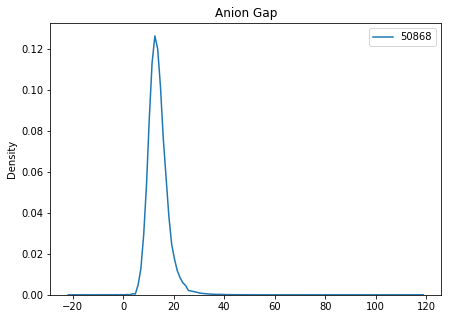

   itemid  patients       mean  median       std
0   50868     52808  13.772912    13.0  3.882666

After removing outliers:


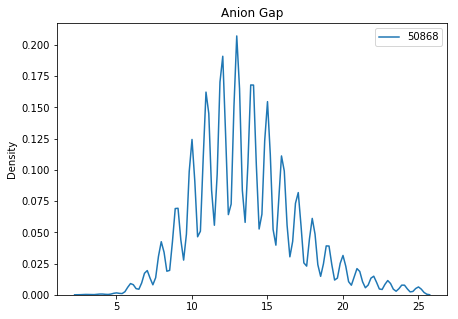

   itemid  patients      mean  median       std
0   50868     52682  13.58417    13.0  3.425031

Bicarbonate

Before removing outliers:


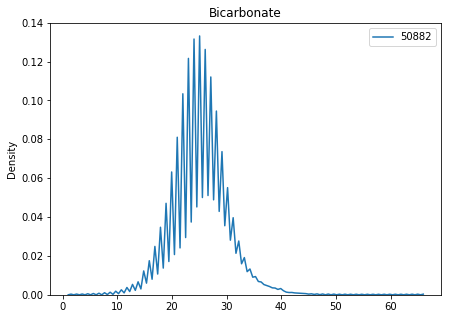

   itemid  patients       mean  median      std
0   50882     52825  25.258974    25.0  5.03566

After removing outliers:


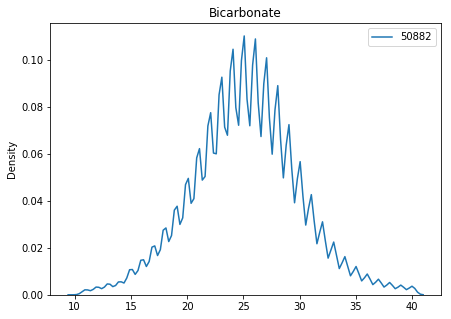

   itemid  patients       mean  median       std
0   50882     52744  25.217707    25.0  4.754739

Calcium (Total)

Before removing outliers:


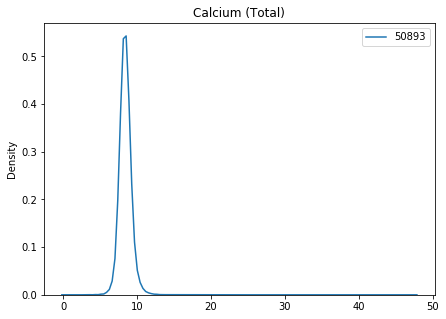

   itemid  patients      mean  median       std
0   50893     49002  8.429568     8.4  0.834552

After removing outliers:


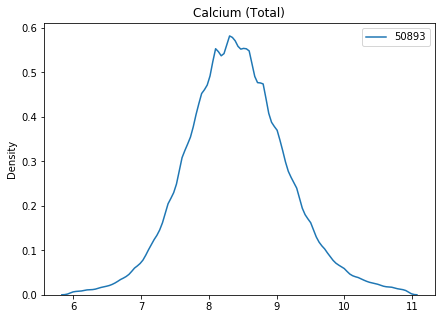

   itemid  patients      mean  median       std
0   50893     48918  8.411871     8.4  0.747782

Chloride

Before removing outliers:


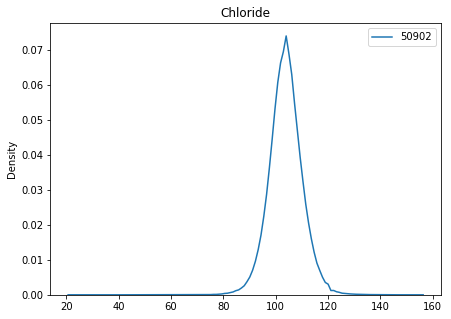

   itemid  patients        mean  median       std
0   50902     52852  103.779464   104.0  6.303991

After removing outliers:


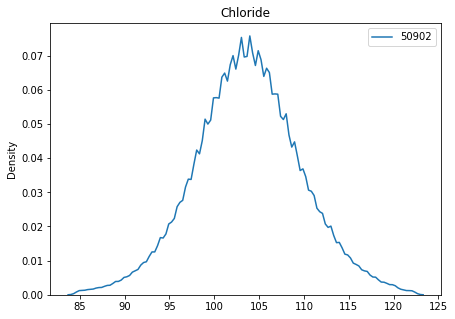

   itemid  patients       mean  median       std
0   50902     52820  103.76669   104.0  5.949302

Creatinine

Before removing outliers:


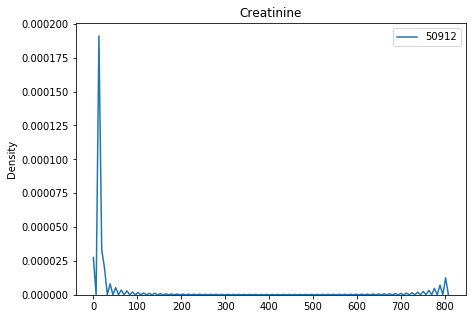

   itemid  patients      mean  median       std
0   50912     50996  1.530655     1.0  1.895441

After removing outliers:


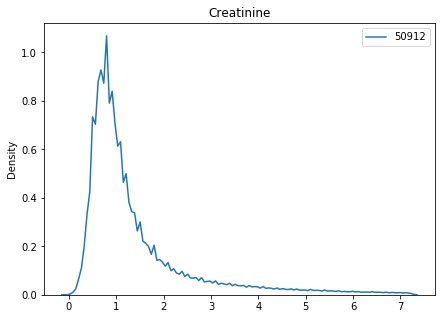

   itemid  patients      mean  median       std
0   50912     50768  1.399745     1.0  1.185649

Glucose

Before removing outliers:


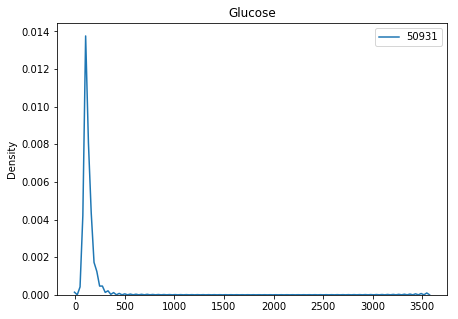

   itemid  patients        mean  median        std
0   50931     50395  132.756433   119.0  66.444797

After removing outliers:


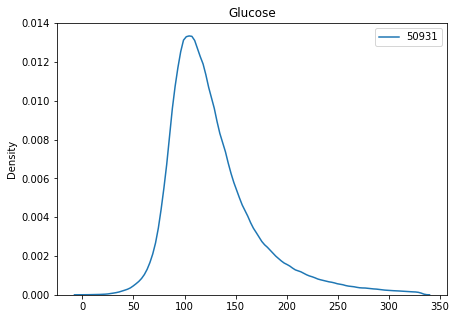

   itemid  patients        mean  median        std
0   50931     50340  127.967324   118.0  43.997325

Magnesium

Before removing outliers:


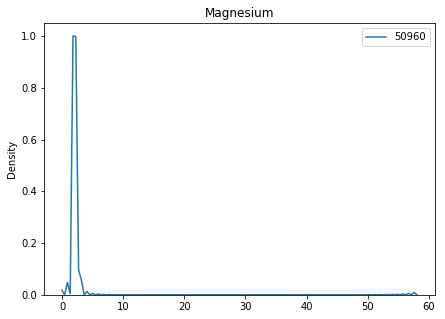

   itemid  patients      mean  median       std
0   50960     49762  2.039457     2.0  0.409426

After removing outliers:


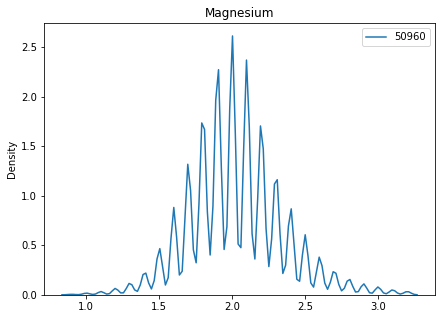

   itemid  patients      mean  median       std
0   50960     49703  2.027987     2.0  0.319837

Potassium

Before removing outliers:


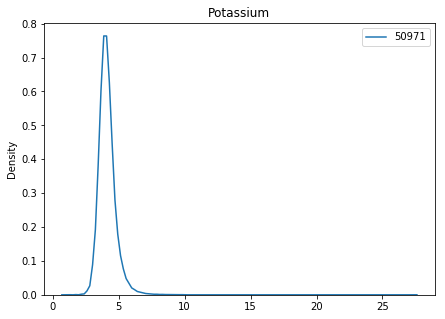

   itemid  patients      mean  median       std
0   50971     52876  4.126318     4.0  0.650398

After removing outliers:


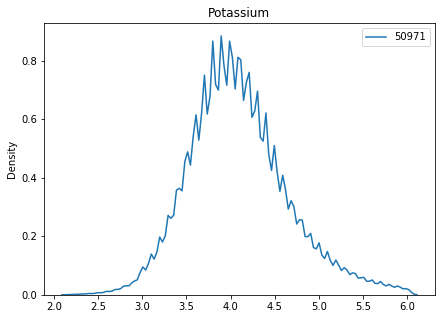

   itemid  patients      mean  median       std
0   50971     52727  4.091554     4.0  0.563087

Sodium

Before removing outliers:


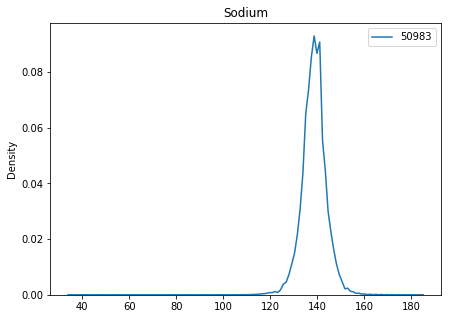

   itemid  patients        mean  median       std
0   50983     52859  138.617959   139.0  5.133123

After removing outliers:


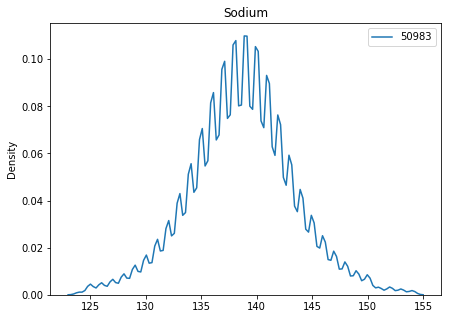

   itemid  patients        mean  median      std
0   50983     52818  138.652734   139.0  4.69385

Urea Nitrogen

Before removing outliers:


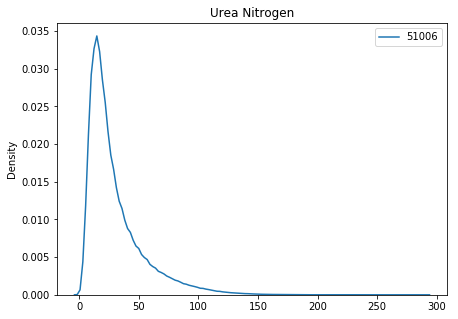

   itemid  patients      mean  median        std
0   51006     51008  30.02692    22.0  23.804153

After removing outliers:


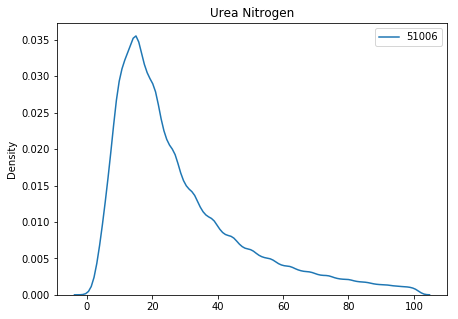

   itemid  patients       mean  median        std
0   51006     50901  28.165888    22.0  19.851674

Basophils

Before removing outliers:


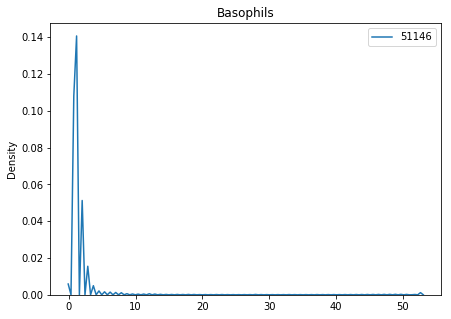

   itemid  patients      mean  median       std
0   51146     44246  0.299635     0.2  0.635749

After removing outliers:


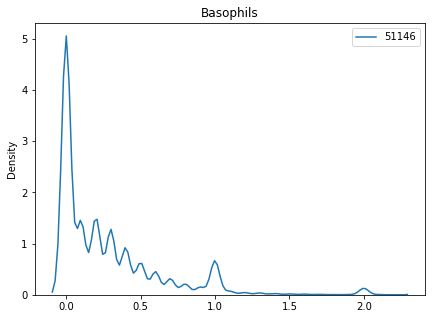

   itemid  patients      mean  median       std
0   51146     44172  0.274092     0.2  0.363448

Eosinophils

Before removing outliers:


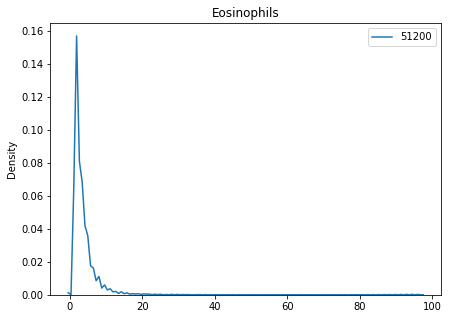

   itemid  patients      mean  median       std
0   51200     44246  1.696921     0.9  2.815068

After removing outliers:


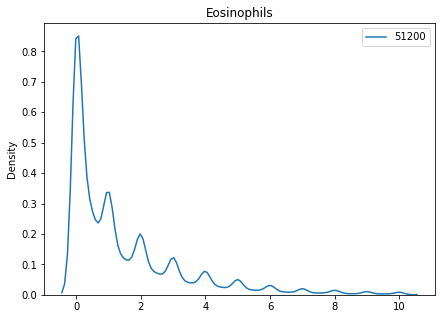

   itemid  patients      mean  median       std
0   51200     44094  1.464419     0.9  1.869913

Hematocrit

Before removing outliers:


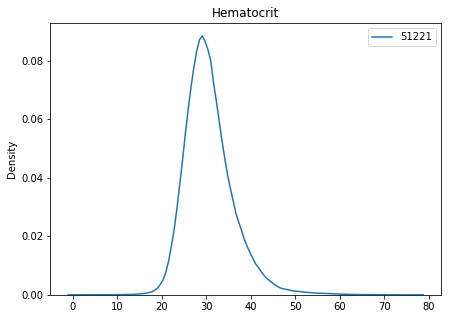

   itemid  patients       mean  median       std
0   51221     57102  30.715236    30.0  5.522901

After removing outliers:


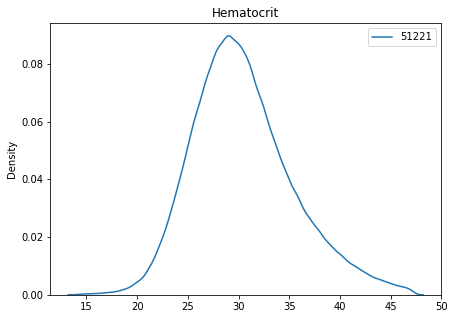

   itemid  patients       mean  median       std
0   51221     52804  30.463843    29.9  4.968125

Hemoglobin

Before removing outliers:


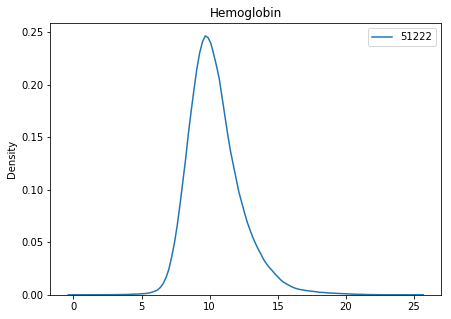

   itemid  patients      mean  median       std
0   51222     56949  10.40664    10.1  1.952585

After removing outliers:


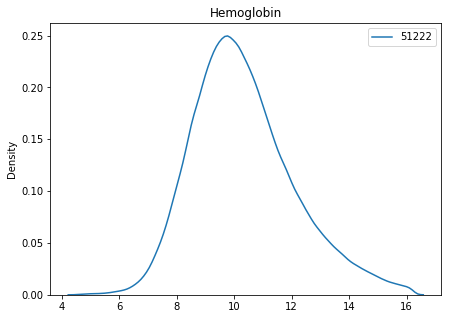

   itemid  patients       mean  median       std
0   51222     52947  10.323677    10.1  1.778098

Lymphocytes

Before removing outliers:


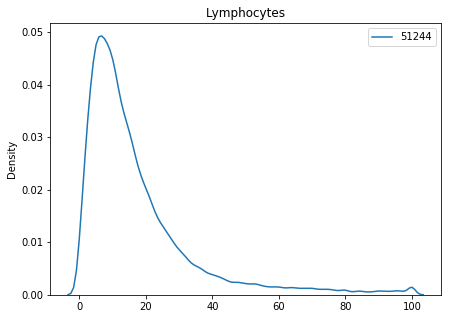

   itemid  patients       mean  median        std
0   51244     44247  17.327375    12.0  16.945853

After removing outliers:


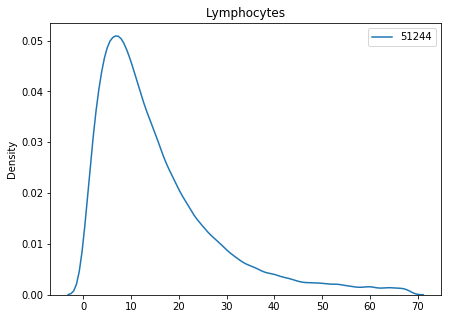

   itemid  patients       mean  median        std
0   51244     43774  15.405097    11.9  12.641068

MCH

Before removing outliers:


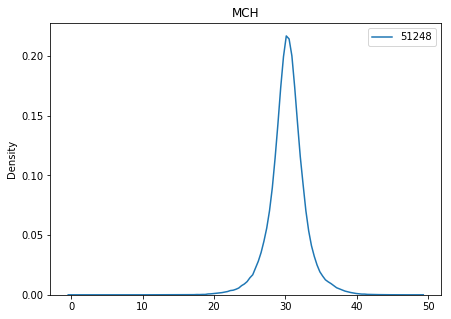

   itemid  patients       mean  median       std
0   51248     56938  30.292456    30.3  2.500433

After removing outliers:


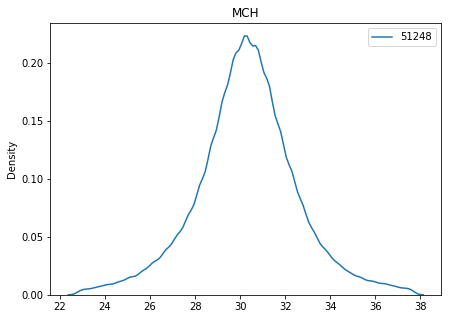

   itemid  patients       mean  median       std
0   51248     55481  30.300119    30.3  2.248281

MCHC

Before removing outliers:


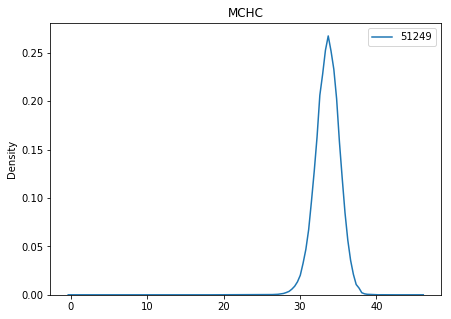

   itemid  patients       mean  median       std
0   51249     56941  33.578911    33.6  1.575285

After removing outliers:


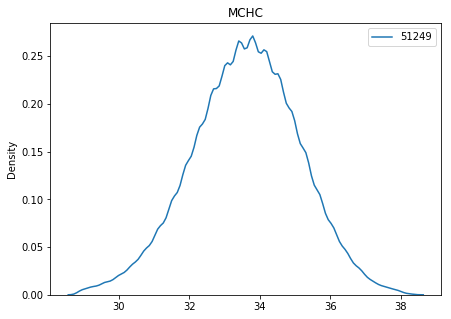

   itemid  patients       mean  median       std
0   51249     56894  33.598609    33.6  1.523018

MCV

Before removing outliers:


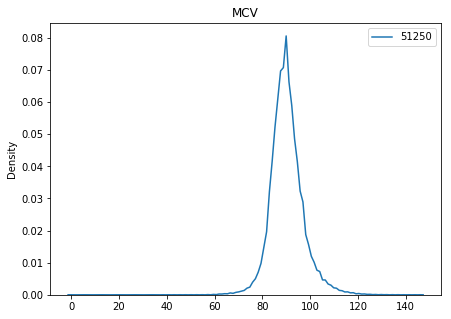

   itemid  patients       mean  median       std
0   51250     56938  90.300854    90.0  6.854976

After removing outliers:


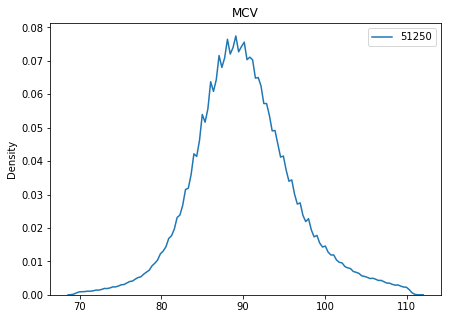

   itemid  patients       mean  median       std
0   51250     55095  90.110851    90.0  6.129328

Monocytes

Before removing outliers:


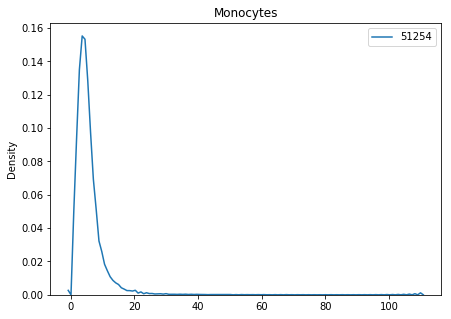

   itemid  patients      mean  median      std
0   51254     44247  5.420769     4.5  4.83894

After removing outliers:


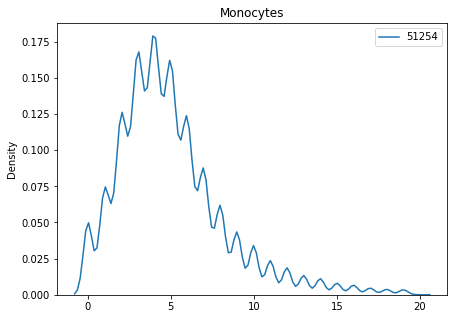

   itemid  patients      mean  median       std
0   51254     44160  4.999224     4.4  3.211409

Neutrophils

Before removing outliers:


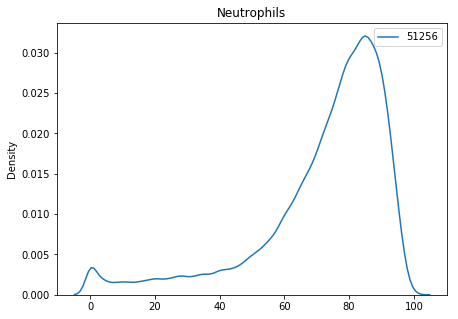

   itemid  patients       mean  median        std
0   51256     44247  71.756738    77.8  20.724846

After removing outliers:


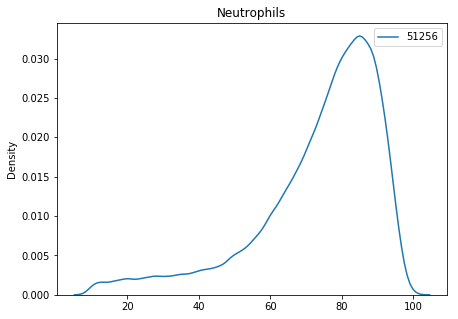

   itemid  patients       mean  median        std
0   51256     44128  73.585575    78.1  17.639552

Platelet Count

Before removing outliers:


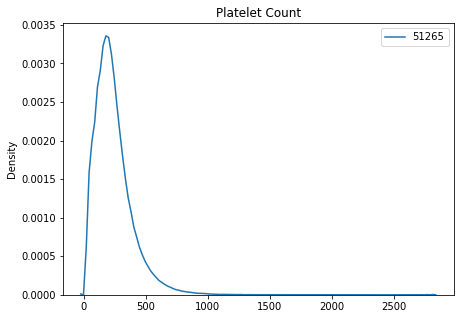

   itemid  patients        mean  median         std
0   51265     56974  236.636716   210.0  152.216988

After removing outliers:


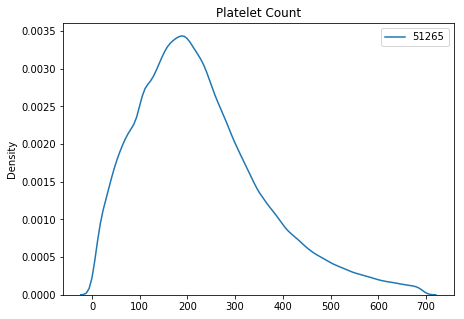

   itemid  patients        mean  median         std
0   51265     56909  227.546896   208.0  131.804492

RDW

Before removing outliers:


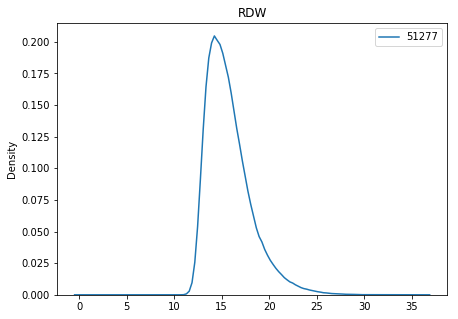

   itemid  patients       mean  median       std
0   51277     56930  15.781929    15.3  2.381525

After removing outliers:


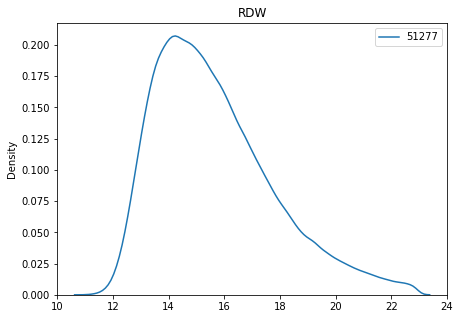

   itemid  patients       mean  median       std
0   51277     56820  15.659768    15.3  2.141176

Red Blood Cells

Before removing outliers:


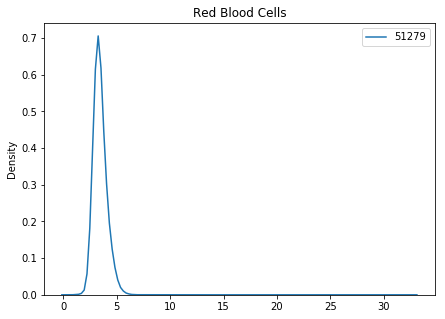

   itemid  patients     mean  median       std
0   51279     56938  3.44839    3.37  0.640932

After removing outliers:


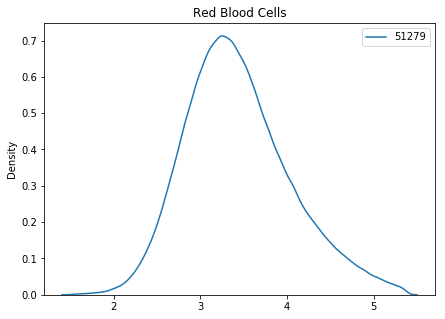

   itemid  patients      mean  median       std
0   51279     55920  3.433236    3.37  0.607688

White blood cells

Before removing outliers:


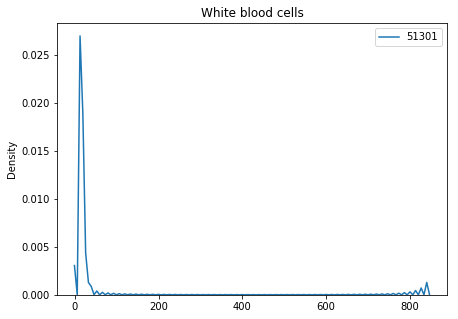

   itemid  patients       mean  median       std
0   51301     56990  11.304008     9.9  9.487122

After removing outliers:


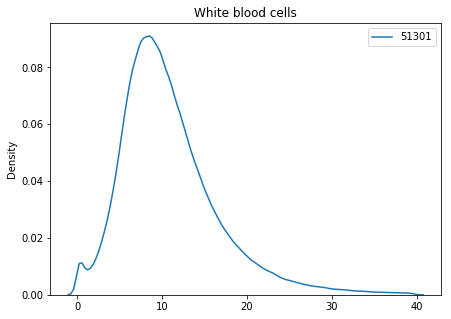

   itemid  patients       mean  median       std
0   51301     56891  10.892758     9.9  5.744257

PTT

Before removing outliers:


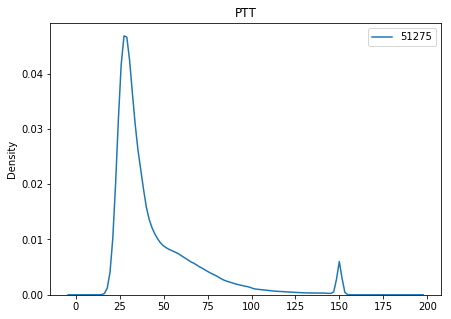

   itemid  patients       mean  median        std
0   51275     48063  44.691134    34.7  25.790675

After removing outliers:


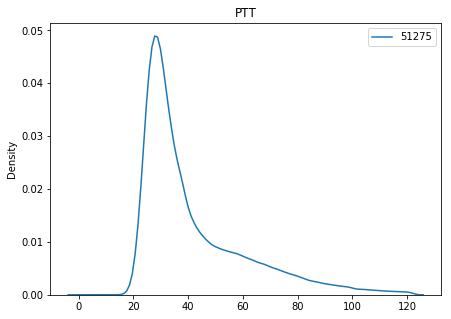

   itemid  patients       mean  median        std
0   51275     47986  41.754522    34.2  19.472958

Lactate

Before removing outliers:


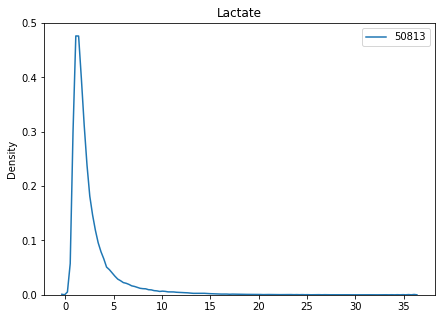

   itemid  patients      mean  median       std
0   50813     34549  2.636718     1.8  2.588021

After removing outliers:


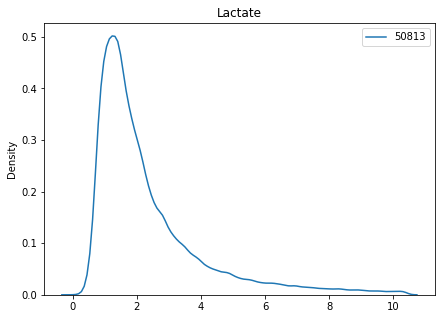

   itemid  patients      mean  median       std
0   50813     34437  2.344729     1.8  1.729496

PCO2

Before removing outliers:


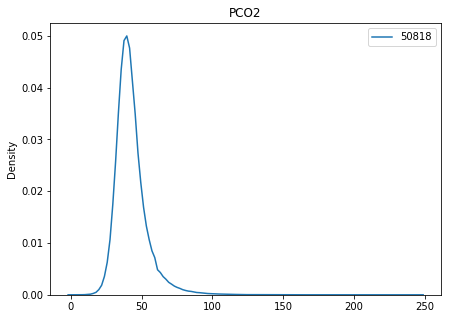

   itemid  patients       mean  median        std
0   50818     37347  42.732719    41.0  11.377772

After removing outliers:


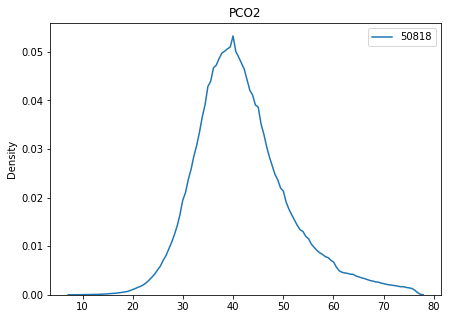

   itemid  patients       mean  median       std
0   50818     37202  41.938423    41.0  9.396434

pH

Before removing outliers:


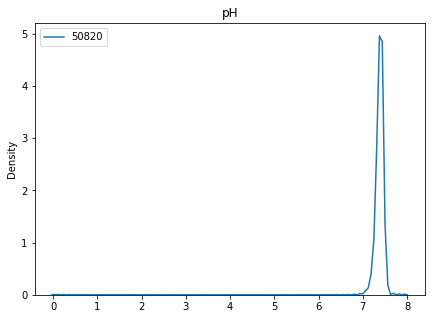

   itemid  patients     mean  median       std
0   50820     38917  7.37929    7.39  0.087134

After removing outliers:


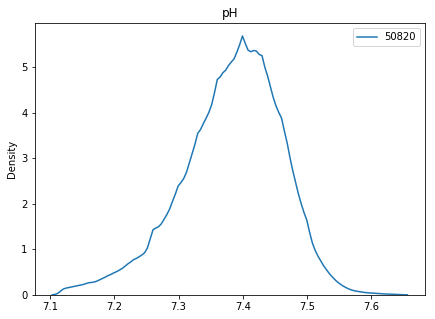

   itemid  patients      mean  median       std
0   50820     38777  7.382757    7.39  0.077633

PO2

Before removing outliers:


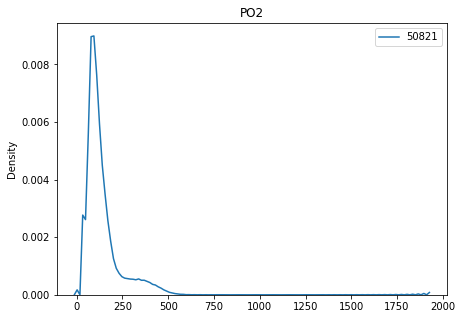

   itemid  patients        mean  median        std
0   50821     37350  136.779812   109.0  92.137273

After removing outliers:


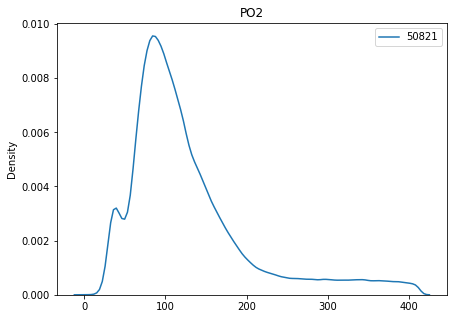

   itemid  patients        mean  median        std
0   50821     37071  128.402588   107.0  76.448717

HR

Before removing outliers:


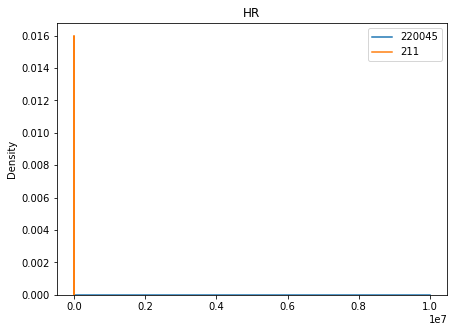

   itemid  patients        mean  median          std
0     211     34901  108.861212    97.0    36.126095
1  220045     21924   91.039794    86.0  6017.072932

After removing outliers:


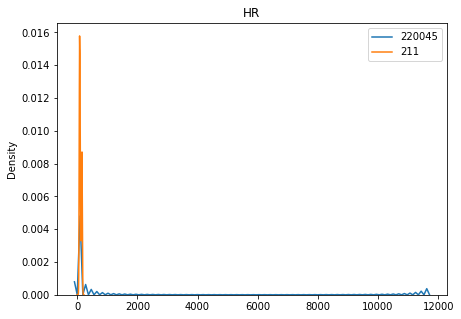

   itemid  patients        mean  median        std
0     211     34900  108.887222    97.0  36.076874
1  220045     21924   87.388417    86.0  20.725913

BP systolic

Before removing outliers:


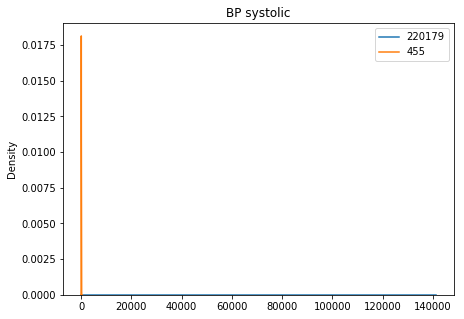

   itemid  patients        mean  median         std
0     455     26429  120.014098   118.0   23.536775
1  220179     21685  120.458251   118.0  249.608552

After removing outliers:


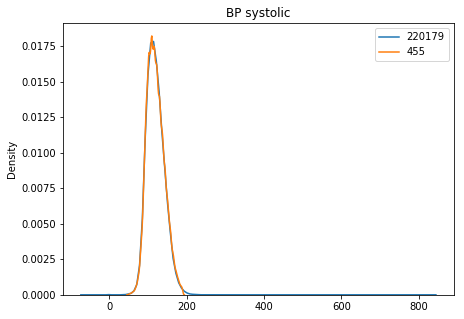

   itemid  patients        mean  median        std
0     455     26409  119.948837   118.0  22.320452
1  220179     21685  119.878841   118.0  22.555525

BP diastolic

Before removing outliers:


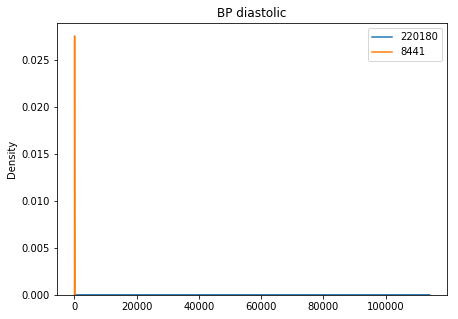

   itemid  patients       mean  median         std
0    8441     26411  58.027487    57.0   15.567736
1  220180     21685  65.183290    61.0  389.373326

After removing outliers:


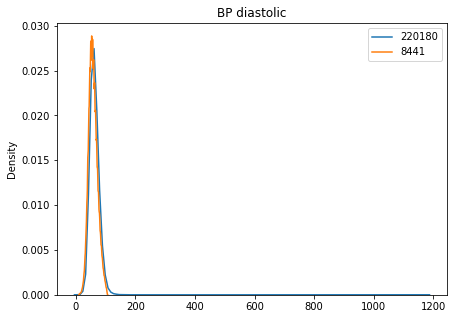

   itemid  patients       mean  median        std
0    8441     26407  57.790707    57.0  14.866665
1  220180     21685  62.831124    61.0  15.720790

BP mean

Before removing outliers:


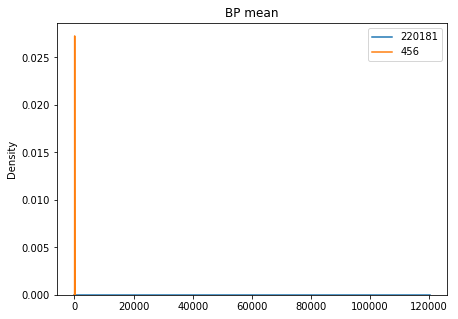

   itemid  patients       mean     median         std
0     456     26397  77.225114  75.666702   15.753650
1  220181     21676  76.673120  75.000000  174.583058

After removing outliers:


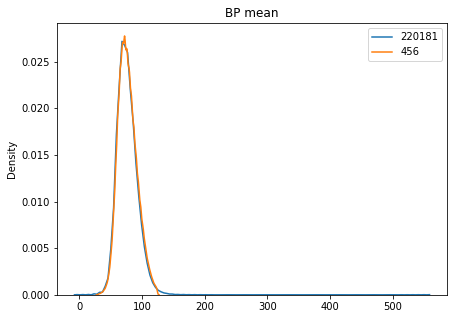

   itemid  patients       mean     median        std
0     456     26390  76.960479  75.333298  15.061097
1  220181     21676  76.304149  75.000000  15.720407

Respiratory rate

Before removing outliers:


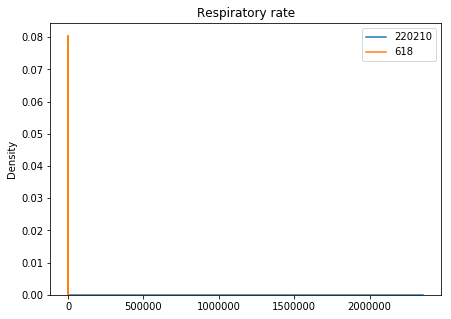

   itemid  patients       mean  median          std
0     618     27195  20.133307    20.0     6.406810
1  220210     21913  20.923463    20.0  1423.805365

After removing outliers:


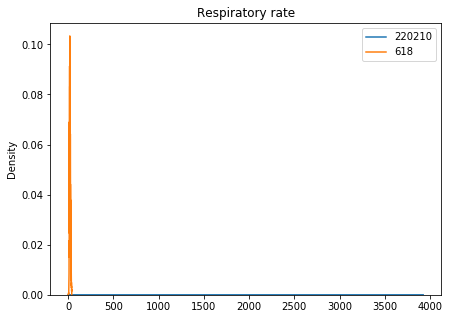

   itemid  patients       mean  median       std
0     618     27193  20.052310    20.0  5.886978
1  220210     21913  20.062869    20.0  7.969872

Oxygen saturation

Before removing outliers:


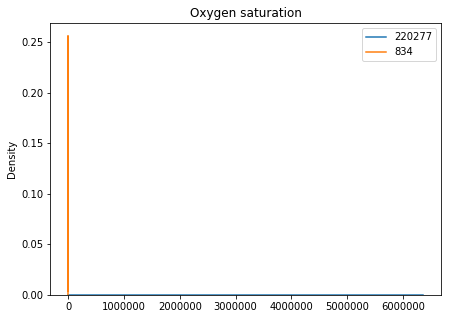

   itemid  patients        mean  median          std
0     834     17630   96.762680    97.0     3.030396
1  220277     21904  100.922544    97.0  4435.541448

After removing outliers:


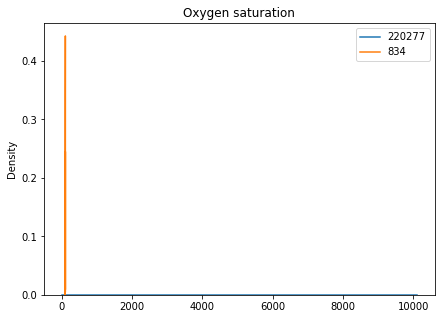

   itemid  patients       mean  median        std
0     834     17492  96.845155    97.0   2.688084
1  220277     21904  96.926237    97.0  27.132688

Temperature F

Before removing outliers:


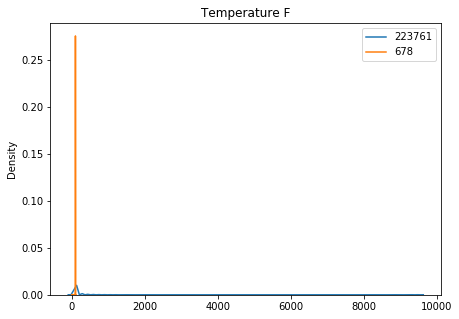

   itemid  patients       mean     median        std
0     678     26642  98.571834  98.599998   2.668473
1  223761     21673  98.407970  98.300000  14.681127

After removing outliers:


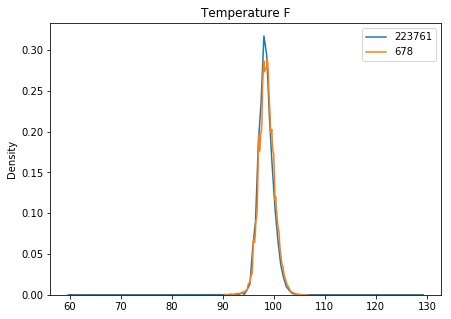

   itemid  patients       mean     median       std
0     678     26624  98.631967  98.599998  1.531440
1  223761     21650  98.431849  98.400000  1.444561

Admission weight

Before removing outliers:


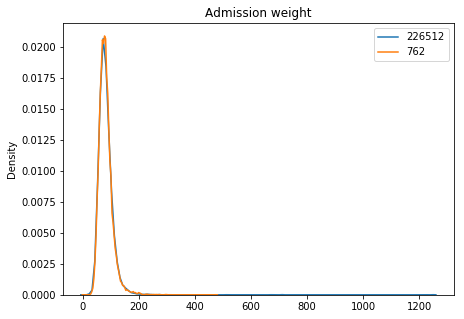

   itemid  patients       mean  median        std
0     762     20045  81.149934    78.0  23.625398
1  226512     21920  81.054447    77.8  26.085891

After removing outliers:


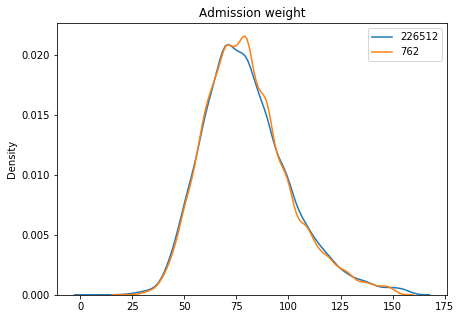

   itemid  patients       mean     median        std
0     762     19840  79.737759  77.900002  20.109615
1  226512     21712  79.948507  77.500000  20.940258

BUN

Before removing outliers:


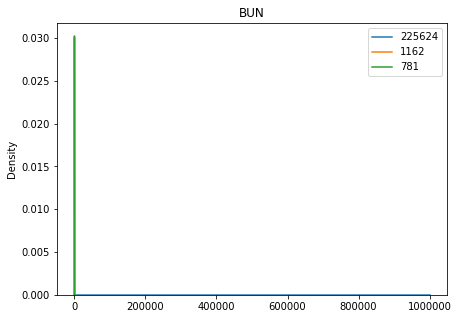

   itemid  patients       mean  median          std
0     781     27354  32.960824    24.0    25.892186
1    1162     21108  32.887724    25.0    25.663993
2  225624     24062  38.393725    24.0  2561.058040

After removing outliers:


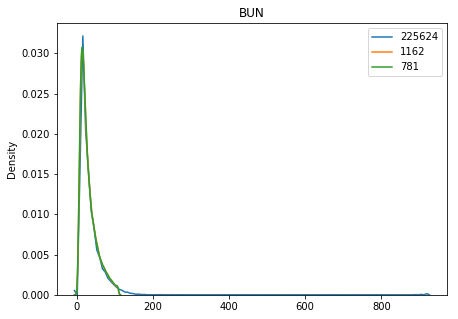

   itemid  patients       mean  median        std
0     781     27267  31.182167    24.0  22.356992
1    1162     21033  31.128458    24.0  22.132993
2  225624     24062  31.835144    24.0  25.547410

Phosphorus

Before removing outliers:


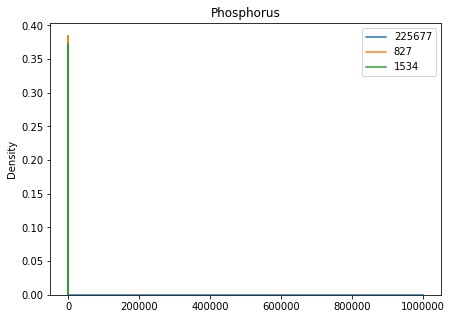

   itemid  patients       mean  median          std
0     827     24839   3.666046     3.4     1.451076
1    1534     20585   3.649682     3.4     1.452145
2  225677     22617  10.940608     3.3  2717.259785

After removing outliers:


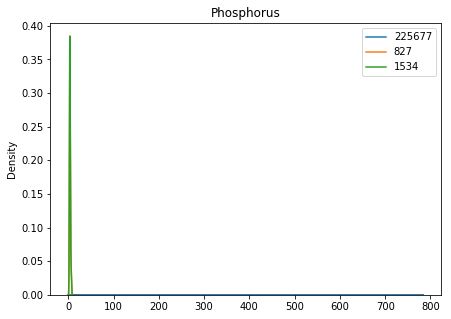

   itemid  patients      mean  median       std
0     827     24721  3.567889     3.4  1.224009
1    1534     20485  3.557393     3.4  1.242246
2  225677     22617  3.557081     3.3  2.606914

QA STATS:
Original DF length:  43280747
Original unique admissions:  58294
New DF length:  43002318
New unique admissions:  58289


In [8]:
df = remove_outliers(df=df, ids='new_id', sigma=3)

For the following concepts, removing outliers was successful in making the distributions match up to an<br/>
acceptable extent between the CareVue and Metavision databases:<br/>
1) BP systolic<br/>
2) BP diastolic<br/>
3) BP mean<br/>
4) Temperature F<br/>
5) Admission weight<br/>
6) BUN<br/><br/>

However, for Heart rate, Respiratory rate, Oxygen saturation and Phosphorus, the distributions still don't match,<br/>
and this is caused by some very large recordings still existing in the Metavision database. Thereofore, to<br/>
address this, any Metavision values that fall outside the range of values from the CareVue database will be removed.

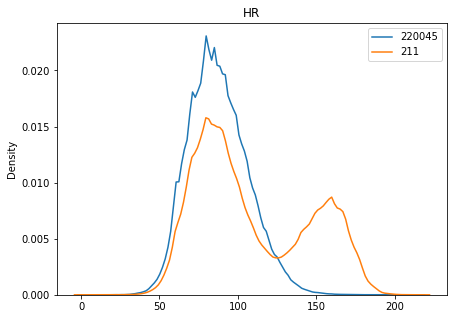

   itemid  patients        mean  median        std
0     211     34900  108.887222    97.0  36.076874
1  220045     21924   87.409335    86.0  18.715403


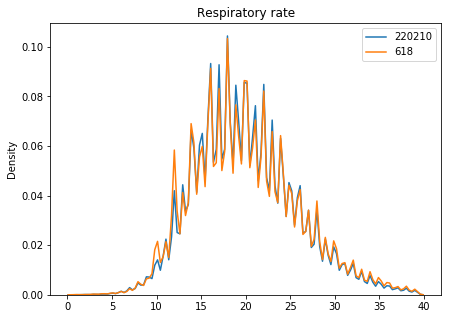

   itemid  patients       mean  median       std
0     618     27193  20.052310    20.0  5.886978
1  220210     21913  20.020554    20.0  5.631525


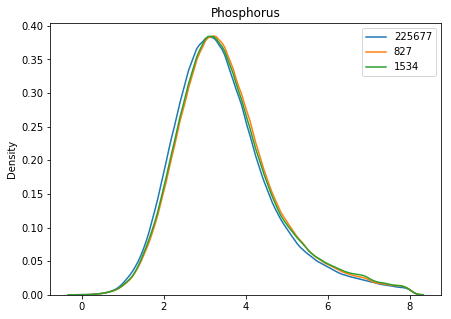

   itemid  patients      mean  median       std
0     827     24721  3.567889     3.4  1.224009
1    1534     20485  3.557393     3.4  1.242246
2  225677     22516  3.469069     3.3  1.219192


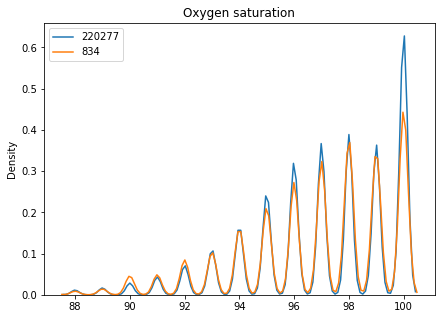

   itemid  patients       mean  median       std
0     834     17492  96.845155    97.0  2.688084
1  220277     21890  97.068821    97.0  2.612080


In [9]:
# Find equivalent min and max values from Carevue

# Heart_rate
hr_low = df[df['itemid']==211].valuenum.min()
hr_high = df[df['itemid']==211].valuenum.max()

# Respiratory_rate
rr_low = df[df['itemid']==618].valuenum.min()
rr_high = df[df['itemid']==618].valuenum.max()

# Phosphorus
p_low = df[(df['itemid']==827) | (df['itemid']==1534)].valuenum.min()
p_high = df[(df['itemid']==827) | (df['itemid']==1534)].valuenum.max()

# Oxygen saturation
os_low = df[df['itemid']==834].valuenum.min()
os_high = df[df['itemid']==834].valuenum.max()

# Define a function that for a new_id, removes any values that
# fall outside a specified range
def manual_range_change(df, new_id, low, high):
    df['valuenum'] = np.where((df['valuenum']>high) & (df['new_id']==new_id),
                              np.nan, df['valuenum'])
    df['valuenum'] = np.where((df['valuenum']<low) & (df['new_id']==new_id),
                              np.nan, df['valuenum'])
    compare_itemids(df[df['new_id']==new_id])
    df.dropna(inplace=True)
    return df

df = manual_range_change(df, 9999018, hr_low, hr_high)
df = manual_range_change(df, 9999025, rr_low, rr_high)
df = manual_range_change(df, 9999022, p_low, p_high)
df = manual_range_change(df, 9999040, os_low, os_high)

For Respiratory rate, Oxygen saturation and Phosphorus, the distributions now match up nearly perfectly. Heart<br/>
rate is still showing some differences, however as the MIMIC documentation explicitally states that the itemids<br/>
211 and 220045 are equivalent for Heart Rate, this difference will be accepted.<br/><br/>

Now the data is acceptably coalesced, the first reading per admission will be taken, and saved on AWS S3.

In [10]:
# Get first reading per admission
first_reading = (df.sort_values(by=['subject_id', 'hadm_id', 'new_id', 'charttime'],
                               ascending=True)
                  .groupby(['subject_id', 'hadm_id', 'new_id'])
                  .first())
first_reading.reset_index(inplace=True)

# Pivot so there is 1 column per new_id reading
first_reading = pd.pivot_table(first_reading, values='valuenum',
                               index=['subject_id', 'hadm_id'],
                               columns='name')
first_reading.reset_index(inplace=True)

# Manual cleaning - ensure hadm_id is an int
first_reading['hadm_id'] = first_reading['hadm_id'].astype(int)

# Save to S3
to_s3(obj=first_reading,
      bucket='mimic-jamesi',
      filepath='data/first_reading.csv')

print('first_reading')
print("Rows: ", len(first_reading))
first_reading.head(25)

first_reading
Rows:  58289


name,subject_id,hadm_id,Admission weight,Anion Gap,BP diastolic,BP mean,BP systolic,BUN,Basophils,Bicarbonate,...,Platelet Count,Potassium,RDW,Red Blood Cells,Respiratory rate,Sodium,Temperature F,Urea Nitrogen,White blood cells,pH
0,2,163353,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,5.0,NaN,15.5,4.81,NaN,NaN,NaN,NaN,0.1,NaN
1,3,145834,96.800003,17.0,24.0,36.666698,62.0,41.0,0.0,25.0,...,282.0,5.4,15.1,3.44,16.0,136.0,96.900002,53.0,12.7,7.35
2,4,185777,NaN,17.0,63.0,80.666702,116.0,10.0,0.1,24.0,...,207.0,3.1,13.6,3.80,18.0,135.0,99.400002,9.0,9.7,7.47
3,5,178980,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,309.0,NaN,16.7,3.96,NaN,NaN,NaN,NaN,13.9,NaN
4,6,107064,NaN,23.0,40.0,72.666702,138.0,65.0,0.1,15.0,...,315.0,5.4,16.8,3.44,13.0,138.0,96.800003,62.0,10.6,7.39
5,7,118037,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,223.0,NaN,18.2,5.01,NaN,NaN,NaN,NaN,22.8,NaN
6,8,159514,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,263.0,NaN,17.1,5.02,NaN,NaN,NaN,NaN,18.7,NaN
7,9,150750,104.000000,13.0,NaN,NaN,NaN,17.0,1.2,30.0,...,258.0,2.8,13.4,4.50,16.0,140.0,95.099998,16.0,7.5,7.39
8,10,184167,NaN,17.0,NaN,NaN,NaN,NaN,0.0,23.0,...,414.0,5.1,16.3,4.12,NaN,133.0,NaN,NaN,9.2,NaN
9,11,194540,NaN,13.0,42.0,64.000000,108.0,14.0,0.1,25.0,...,229.0,3.8,13.4,4.31,19.0,138.0,99.000000,12.0,8.5,7.52
